In [1]:
import sys
sys.path.insert(0, "..")

import numpy as np
from matplotlib import pyplot as plt
from os import listdir
from os.path import isfile, join

from module.base.network import Network
from module.simulation.meanfield import MeanField
import module.components.CONST as CONST

## Comparison of states and currents for larger systems
Four electrodes are attached to the flat system at all edges.

In [2]:
net_sizes = np.arange(2, 11)
nets = [Network(size, size, 1, [[0,0,0], [size - 1, 0, 0],[0, size - 1, 0],[size - 1, size - 1, 0]]) for size in net_sizes]
mfs = [MeanField(net) for net in nets]

In [3]:
voltage_configs = np.loadtxt("../data/large_sys/voltage_configs.csv")

In [4]:
states_mf_e4 = []
for i in range(len(net_sizes)):
    size = net_sizes[i]
    state = np.loadtxt("../data/large_sys/mf_1e-4/states"+str(size)+"x"+str(size)+".csv")
    states_mf_e4.append(state)
    
currents_mf_e4 = []
for i in range(len(net_sizes)):
    size = net_sizes[i]
    current = np.loadtxt("../data/large_sys/mf_1e-4/currents"+str(size)+"x"+str(size)+".csv")
    currents_mf_e4.append(current)

In [5]:
states_mf_e3 = []
for i in range(len(net_sizes)):
    size = net_sizes[i]
    state = np.loadtxt("../data/large_sys/mf_3e-3/states"+str(size)+"x"+str(size)+".csv")
    states_mf_e3.append(state)
    
currents_mf_e3 = []
for i in range(len(net_sizes)):
    size = net_sizes[i]
    current = np.loadtxt("../data/large_sys/mf_3e-3/currents"+str(size)+"x"+str(size)+".csv")
    currents_mf_e3.append(current)

In [6]:
states_kmc = []
for i in range(len(net_sizes)):
    state = np.loadtxt("../data/large_sys/kmc/mean_state_Nx="+str(net_sizes[i])+"_Ny="+str(net_sizes[i])+"_Nz=1_Ne=4.csv", delimiter=",", skiprows=1)
    states_kmc.append(state)
    
currents_kmc = []
for i in range(len(net_sizes)):
    net_size = net_sizes[i]
    data = np.loadtxt("../data/large_sys/kmc/Nx="+str(net_size)+"_Ny="+str(net_size)+"_Nz=1_Ne=4.csv", delimiter = ",", skiprows = 1)
    currents_kmc.append(data)

## Size Comparison

In [7]:
MAEs_e4 = []
rel_errs_e4 = []

MAEs_e3 = []
rel_errs_e3 = []

In [8]:
for size_index, size in enumerate(net_sizes):
    size = net_sizes[size_index]

    mf_sort_indices = np.argsort(voltage_configs[:,0], axis = 0)
    kmc_sort_indices = np.argsort(currents_kmc[size_index][:,0], axis = 0)

    sorted_mf_states = states_mf_e4[size_index][mf_sort_indices]
    sorted_mf_currents = currents_mf_e4[size_index][mf_sort_indices]
    sorted_voltage_config = voltage_configs[mf_sort_indices]

    sorted_kmc_states = states_kmc[size_index][kmc_sort_indices]
    sorted_kmc_currents = currents_kmc[size_index][kmc_sort_indices][:, 6] / 1000 * CONST.electron_charge
    sorted_kmc_steps = currents_kmc[size_index][kmc_sort_indices][:,5]
    sorted_kmc_valid = np.where(sorted_kmc_steps < 10000000, True, False)
    sorted_kmc_valid_indices = np.where(sorted_kmc_valid)[0]

    MAE = np.mean(np.abs(sorted_mf_states - sorted_kmc_states), axis = 1)
    MAE_valid = MAE[sorted_kmc_valid_indices]

    MAEs_e4.append(np.mean(MAE_valid))

    rel_err = np.abs((sorted_mf_currents - sorted_kmc_currents) / sorted_kmc_currents)
    rel_err_valid = rel_err[sorted_kmc_valid_indices]
    rel_errs_e4.append(np.mean(rel_err_valid))

for size_index, size in enumerate(net_sizes):
    size = net_sizes[size_index]

    mf_sort_indices = np.argsort(voltage_configs[:,0], axis = 0)
    kmc_sort_indices = np.argsort(currents_kmc[size_index][:,0], axis = 0)

    sorted_mf_states = states_mf_e3[size_index][mf_sort_indices]
    sorted_mf_currents = currents_mf_e3[size_index][mf_sort_indices]
    sorted_voltage_config = voltage_configs[mf_sort_indices]

    sorted_kmc_states = states_kmc[size_index][kmc_sort_indices]
    sorted_kmc_currents = currents_kmc[size_index][kmc_sort_indices][:, 6] / 1000 * CONST.electron_charge
    sorted_kmc_steps = currents_kmc[size_index][kmc_sort_indices][:,5]
    sorted_kmc_valid = np.where(sorted_kmc_steps < 10000000, True, False)
    sorted_kmc_valid_indices = np.where(sorted_kmc_valid)[0]

    MAE = np.mean(np.abs(sorted_mf_states - sorted_kmc_states), axis = 1)
    MAE_valid = MAE[sorted_kmc_valid_indices]

    MAEs_e3.append(np.mean(MAE_valid))

    rel_err = np.abs((sorted_mf_currents - sorted_kmc_currents) / sorted_kmc_currents)
    rel_err_valid = rel_err[sorted_kmc_valid_indices]
    rel_errs_e3.append(np.mean(rel_err_valid))

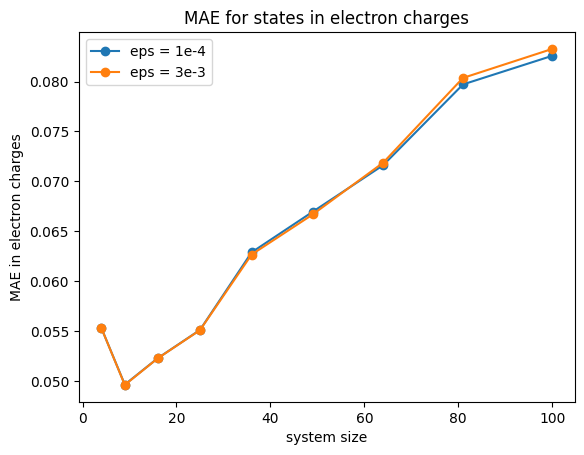

In [9]:
plt.plot(net_sizes ** 2, np.array(MAEs_e4) / CONST.electron_charge, marker = "o", label = "eps = 1e-4")
plt.plot(net_sizes ** 2, np.array(MAEs_e3) / CONST.electron_charge, marker = "o", label = "eps = 3e-3")
plt.xlabel("system size")
plt.ylabel("MAE in electron charges")
plt.title("MAE for states in electron charges")
plt.legend()
plt.savefig("../output/misc/MAE_eps.png")

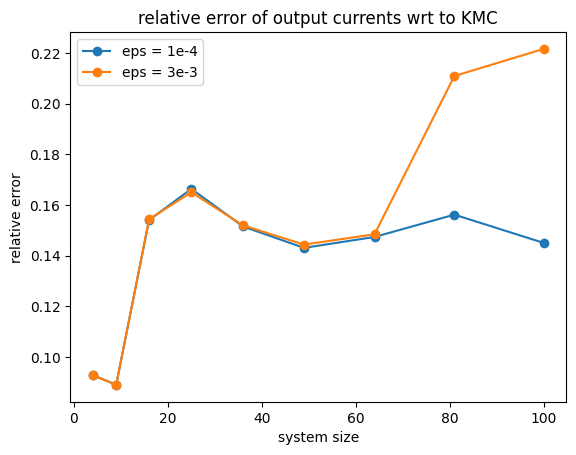

In [10]:
plt.plot(net_sizes ** 2, rel_errs_e4, marker = "o", label = "eps = 1e-4")
plt.plot(net_sizes ** 2, rel_errs_e3, marker = "o", label = "eps = 3e-3")
plt.xlabel("system size")
plt.ylabel("relative error")
plt.title("relative error of output currents wrt to KMC")
plt.legend()
plt.savefig("../output/misc/rel_err_eps.png")

In [11]:
# für große system siz eist cinvergence metric größer als 1e-4

### Closeup View fpr $\epsilon = 10^{-4}$

In [12]:
size_index = 5

size = net_sizes[size_index]
mf_sort_indices = np.argsort(voltage_configs[:,0], axis = 0)
kmc_sort_indices = np.argsort(currents_kmc[size_index][:,0], axis = 0)
sorted_mf_states = states_mf_e4[size_index][mf_sort_indices]
sorted_mf_currents = currents_mf_e4[size_index][mf_sort_indices]
sorted_voltage_config = voltage_configs[mf_sort_indices]
sorted_kmc_states = states_kmc[size_index][kmc_sort_indices]
sorted_kmc_currents = currents_kmc[size_index][kmc_sort_indices][:, 6] / 1000 * CONST.electron_charge
sorted_kmc_steps = currents_kmc[size_index][kmc_sort_indices][:, 5]
sorted_kmc_valid = np.where(sorted_kmc_steps < 10000000, True, False)
sorted_kmc_valid_indices = np.where(sorted_kmc_valid)[0]

In [13]:
# signed differences
error_state = sorted_mf_states - sorted_kmc_states
error_current = sorted_mf_currents - sorted_kmc_currents

# MAEs
MAE_state = np.mean(np.abs(sorted_mf_states - sorted_kmc_states), axis = 1)[sorted_kmc_valid_indices]
MAE_current = np.abs(sorted_mf_currents - sorted_kmc_currents)[sorted_kmc_valid_indices]

# relative errors
rel_err_state = np.mean(np.abs((sorted_mf_states - sorted_kmc_states)/ sorted_kmc_states), axis = 1)[sorted_kmc_valid_indices]
rel_err_current = np.abs((sorted_mf_currents - sorted_kmc_currents)/ sorted_kmc_currents)[sorted_kmc_valid_indices]

Text(0.5, 0, 'output current error in nA')

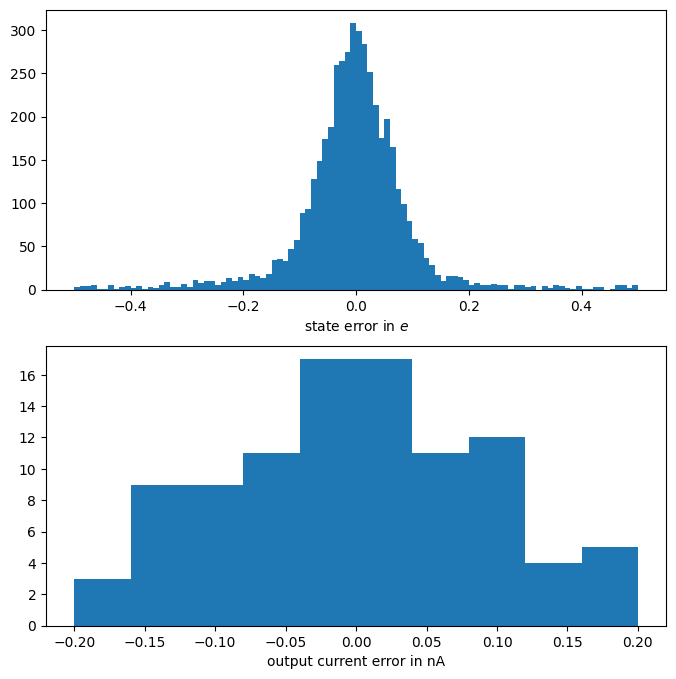

In [14]:
f, (ax1, ax2) = plt.subplots(2, 1, figsize = (8, 8))

ax1.hist(error_state.flatten() / CONST.electron_charge, range = (-0.5,0.5), bins = 100)
ax2.hist(error_current, range = (-0.2, 0.2), bins = 10)

ax1.set_xlabel("state error in $e$")
ax2.set_xlabel("output current error in nA")

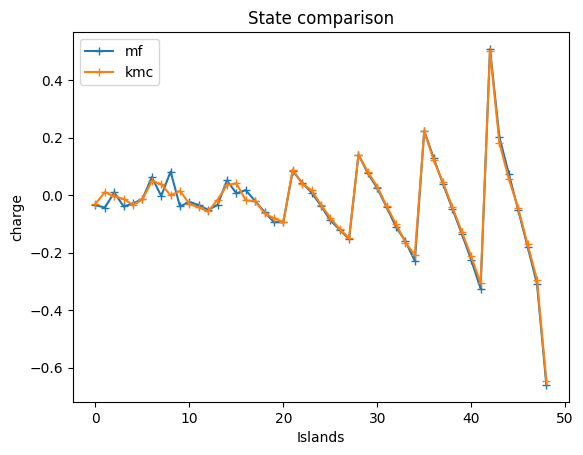

In [15]:
i = np.random.randint(100)
xs = np.arange(size ** 2)
plt.plot(xs, sorted_mf_states[i], label = "mf", marker = "+")
plt.plot(xs, sorted_kmc_states[i], label = "kmc", marker = "+")
plt.xlabel("Islands")
plt.ylabel("charge")
plt.title("State comparison")
plt.legend()

Text(0.5, 1.0, 'output currents for different voltage configs')

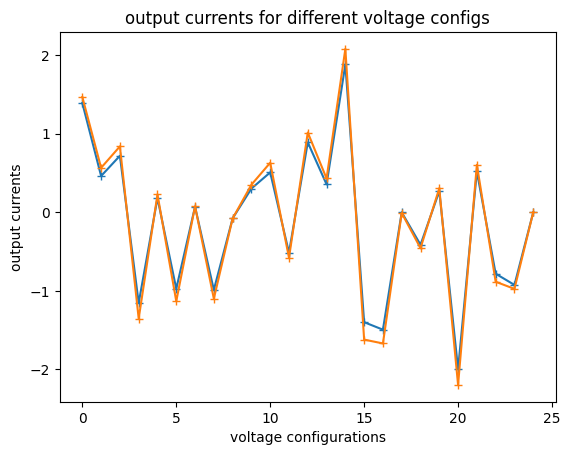

In [16]:
plt.plot(sorted_mf_currents[0:25], marker = "+")
plt.plot(sorted_kmc_currents[0:25], marker = "+")
plt.xlabel("voltage configurations")
plt.ylabel("output currents")
plt.title("output currents for different voltage configs")